In [356]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [357]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


From the above , we see that our dataset is having 32560 rows and 15 columns . From the data our target lable is income ,which is catogorical data so we have to build a classification model who can predict wheather the salary is above or below 50k.

## Exploratory Data Analysis(EDA)


In [358]:
df.shape

(32560, 15)

In [359]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

We have 15 columns and income is our target and the rest are features columns.

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the above it is being displayed that our dataset is having two kind of data object and int64.

In [361]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


From the above describe method we can say that might be our dataset has no missing values as the count value for int64 data are same for every columns.

In [362]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

excellent , our dataset has no any missing value.

In [363]:
df.nunique().to_frame('unique values')

,unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


From the above we can see the uniqness in our dataset.

In [364]:
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        object_datatype.append(x)
print('object = ',object_datatype)        

int_datatype= []
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        int_datatype.append(x)
print('integer 64 = ' ,int_datatype)

object =  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
integer 64 =  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [365]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts)
    print("="*120)

Workclass
<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32560, dtype: object>
Education
<bound method IndexOpsMixin.value_counts of 0          Bachelors
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: Education, Length: 32560, dtype: object>
Marital_status
<bound method IndexOpsMixin.value_counts of 0         Married-civ-spouse
1                   Divorced
2         Married-civ-spouse
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32555     Married-civ-spouse
32556   

## Visualization

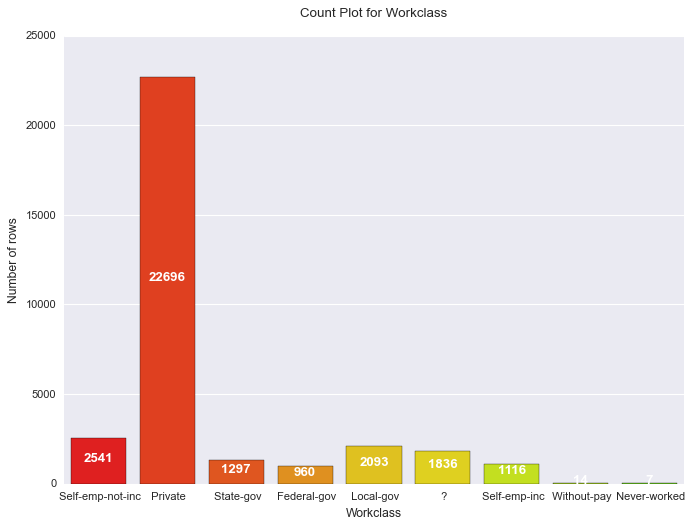

In [366]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'Workclass'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above countplot it is displaying that the number is too high for workclass as Private.

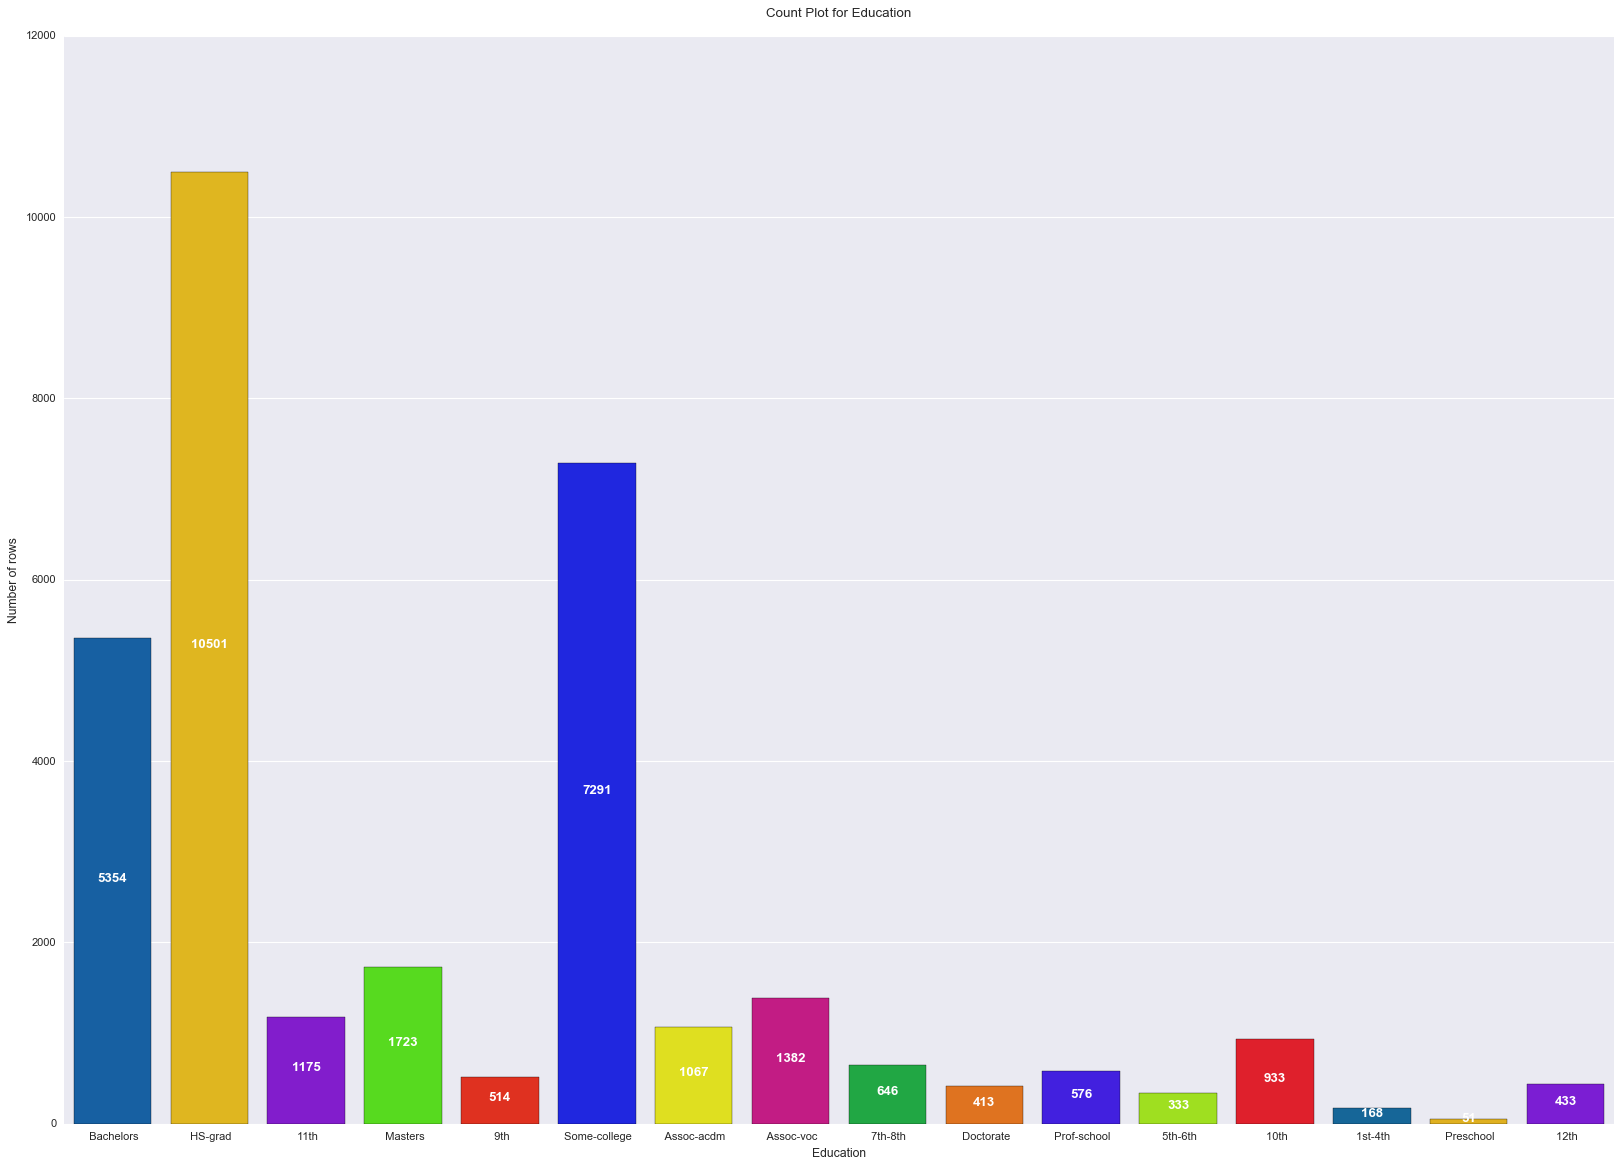

In [367]:
try:
    plt.figure(figsize=(25,17))
    col_name = 'Education'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

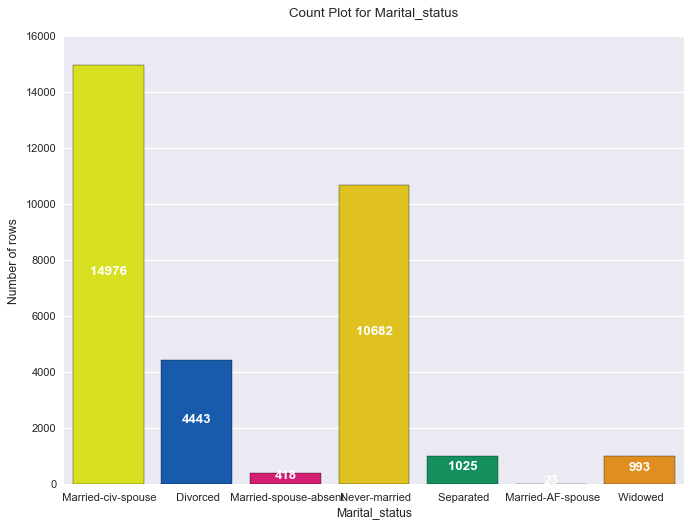

In [368]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'Marital_status'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above graph we can see that the count of married-civ-spouse is highest in all of them.

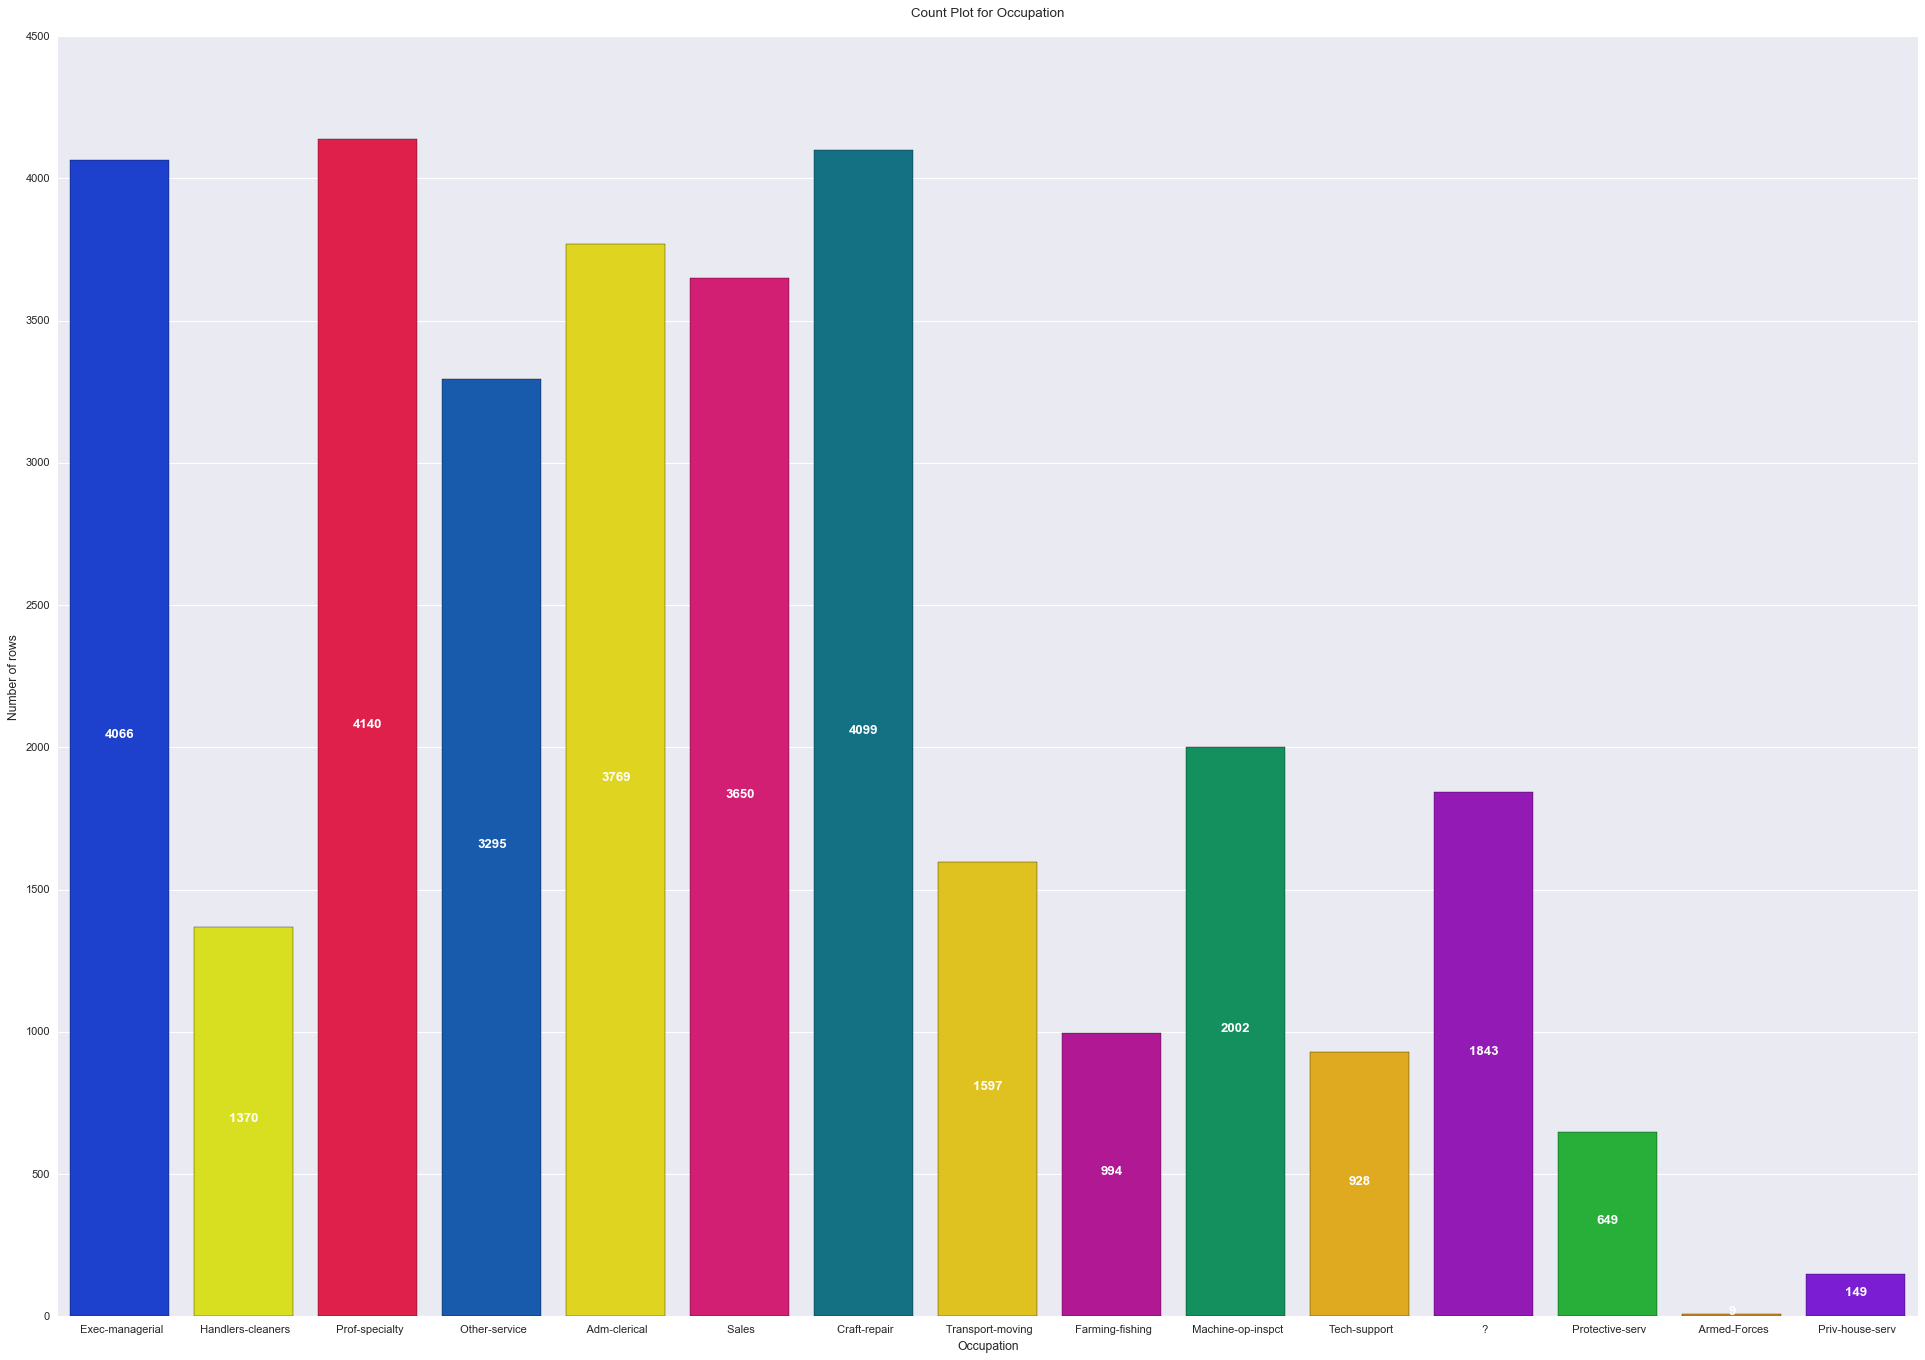

In [369]:
try:
    plt.figure(figsize=(30,20))
    col_name = 'Occupation'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

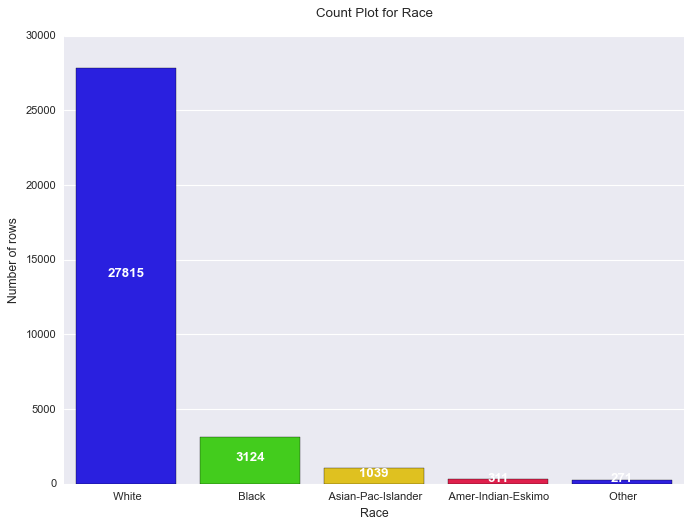

In [370]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'Race'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

Above countplot showing the population of white people is very high as compare to rest of data in Race columns.

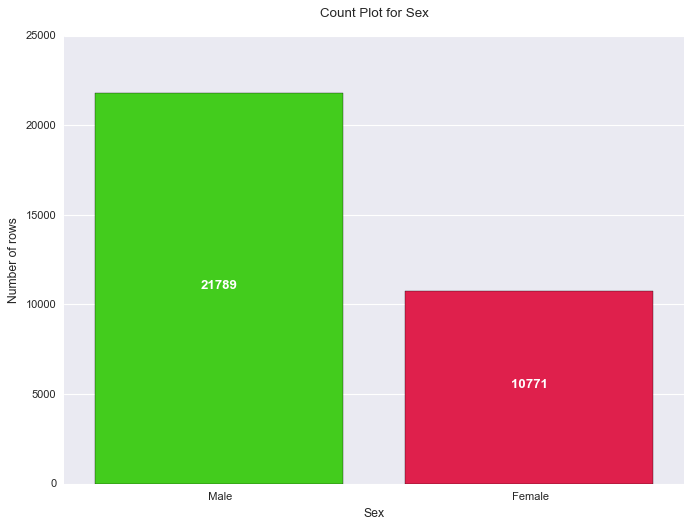

In [371]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'Sex'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above countplot of Sex it is showing that working Male is higher than that of Female.

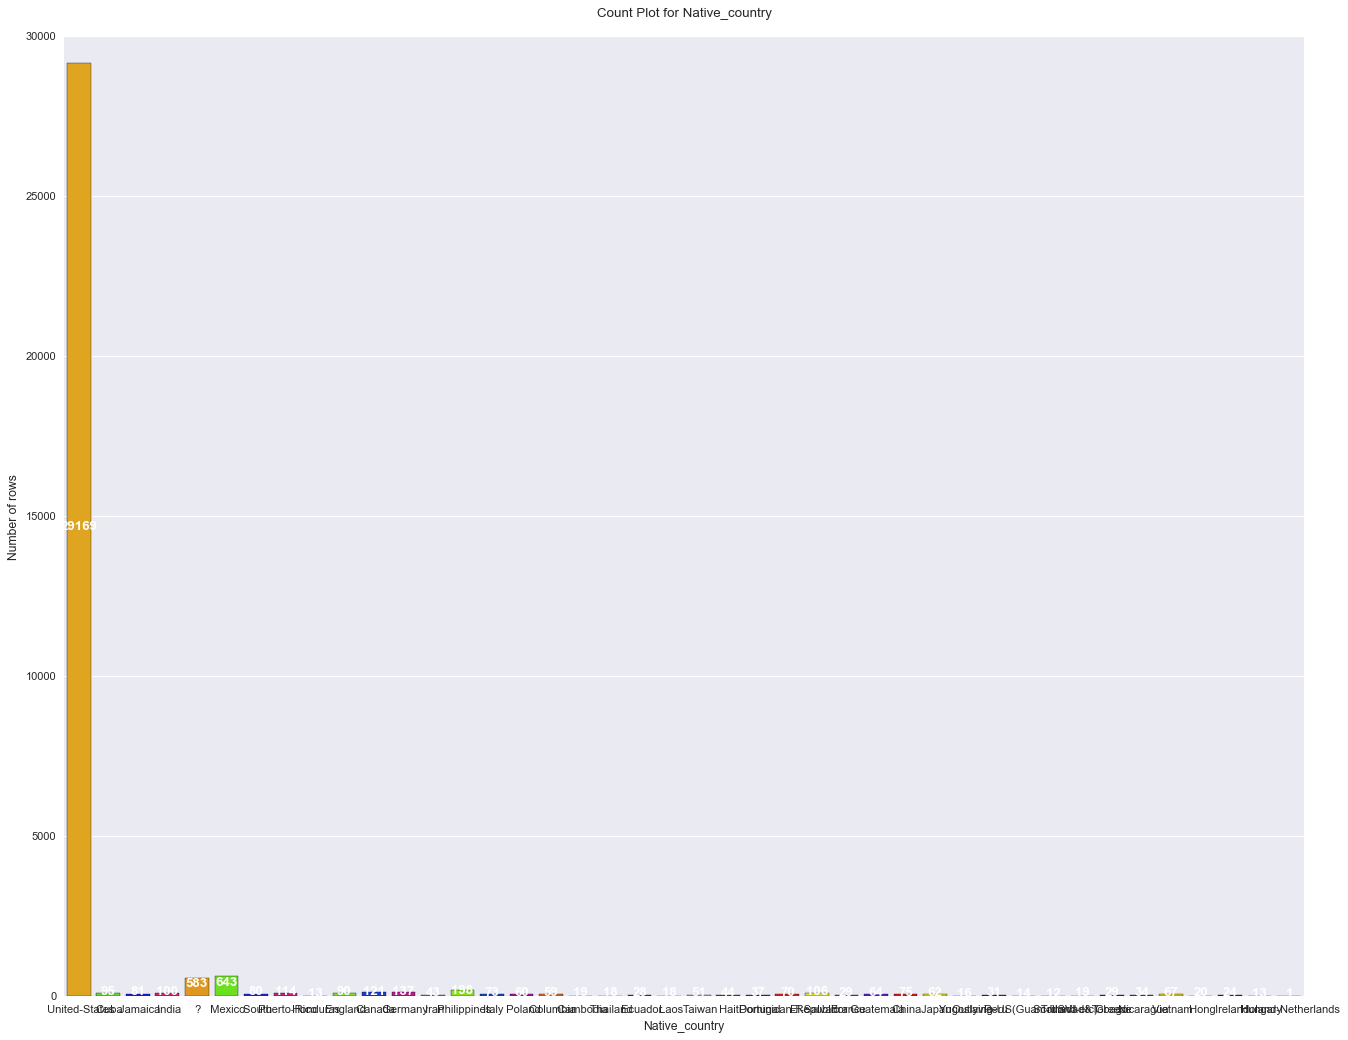

In [372]:
try:
    plt.figure(figsize=(20,15))
    col_name = 'Native_country'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

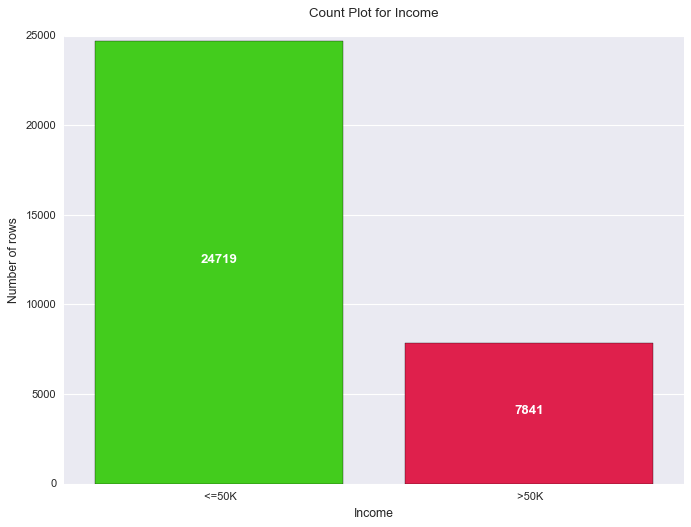

In [373]:
try:
    plt.figure(figsize=(10,7))
    col_name = 'Income'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="prism")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
    
except Exception as e:
    pass

From the above graph we can see that the Income of most of the people are less than 50k.

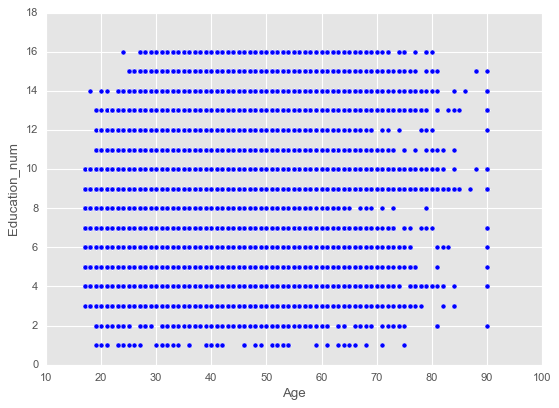

In [374]:
plt.style.use('ggplot')
sns.scatterplot(x='Age',y='Education_num',data=df)
plt.show()

This plot is showing normal value at each of point.

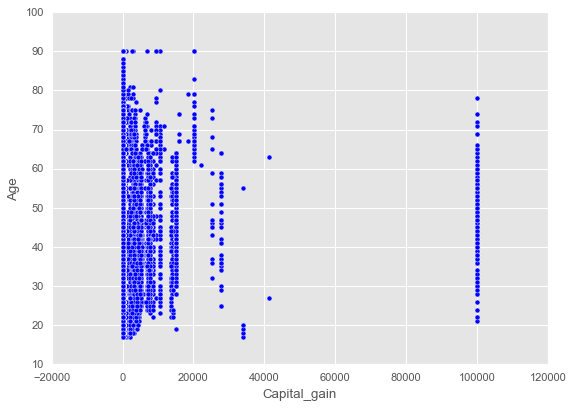

In [375]:
plt.style.use('ggplot')
sns.scatterplot(y='Age',x='Capital_gain',data=df)
plt.show()

From the above plot we have to say that almost every Age is having capital gain in range of 0 to 20000 except few are getting 100000.

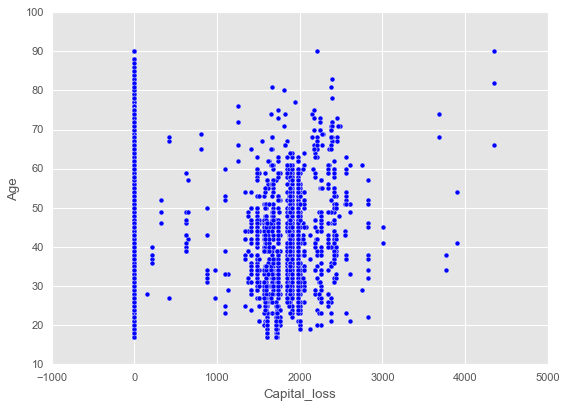

In [376]:
sns.scatterplot(x='Capital_loss',y='Age',data=df)
plt.show()

From the above graph we have Random Capital loss of every Age.

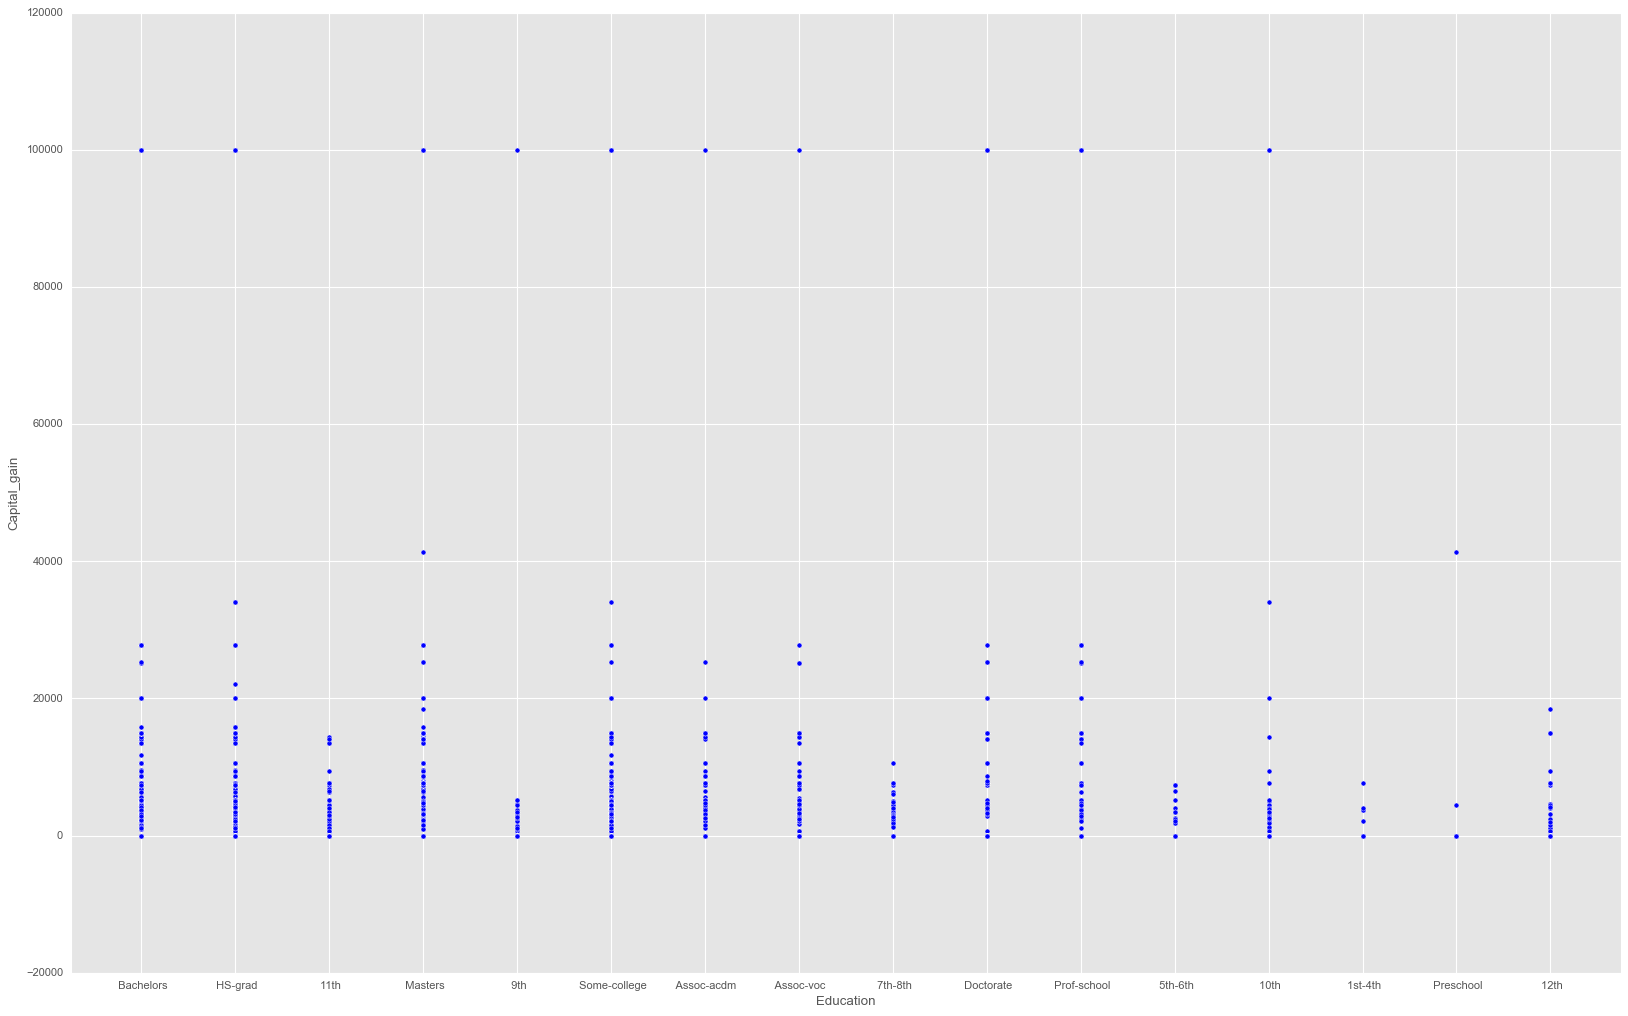

In [377]:
figure=plt.figure(figsize=(25,15))
plt.style.use('seaborn-pastel')
sns.scatterplot(x='Education',y='Capital_gain',data=df)
plt.show()

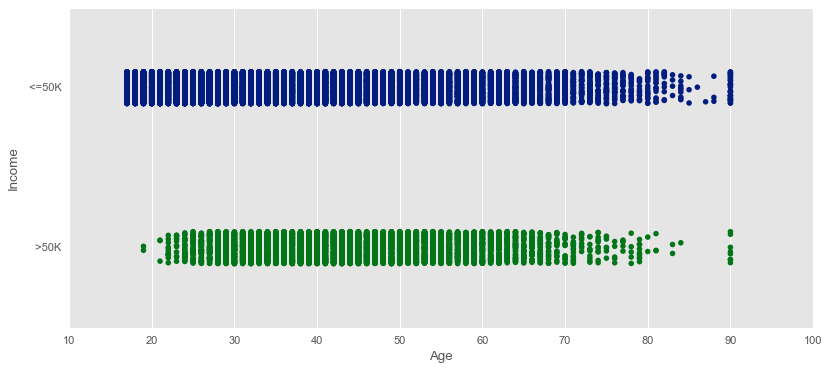

In [378]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x='Age',y='Income',data=df)
plt.show()

From the above graph we can see that young people hardly have income more than 50k.

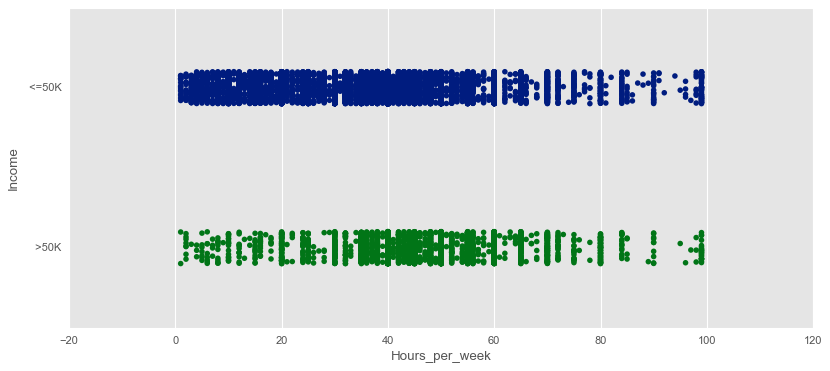

In [379]:
plt.figure(figsize=(12,5))
sns.stripplot(x='Hours_per_week',y='Income',data=df)
plt.show()

From the above stripplot we can see that people having less than or equal to 50k are giving more hour in a week than those whoose income is more than 50k.

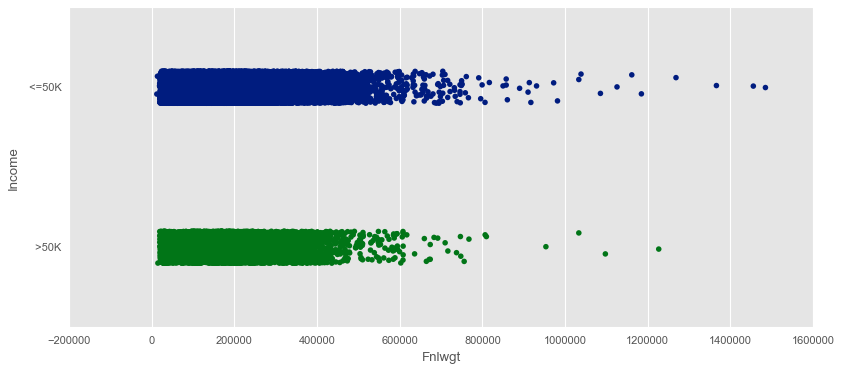

In [380]:
plt.figure(figsize=(12,5))
sns.stripplot(x='Fnlwgt',y='Income',data=df)
plt.show()

From the above graph we can say that the final weight is more cover by person having equal and more 50k.

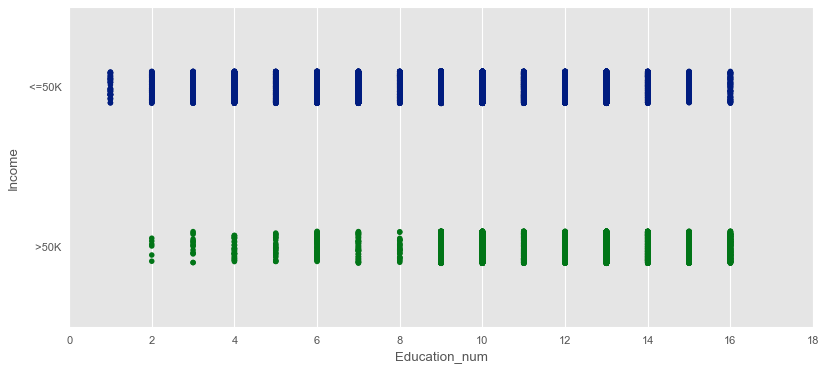

In [381]:
plt.figure(figsize=(12,5))
sns.stripplot(x='Education_num',y='Income',data=df)
plt.show()

From the above plot we can see that the lower the Education_num has rarely income more than 50k.

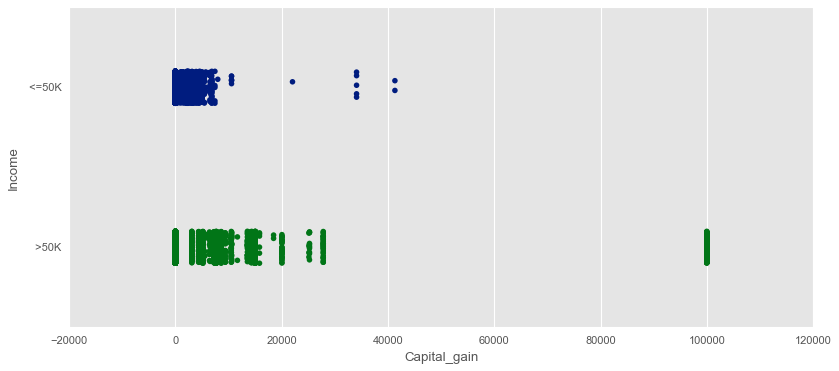

In [382]:
plt.figure(figsize=(12,5))
sns.stripplot(x='Capital_gain',y='Income',data=df)
plt.show()

From the above graph we can see that capital gain is higher whose income is higher than 50k.

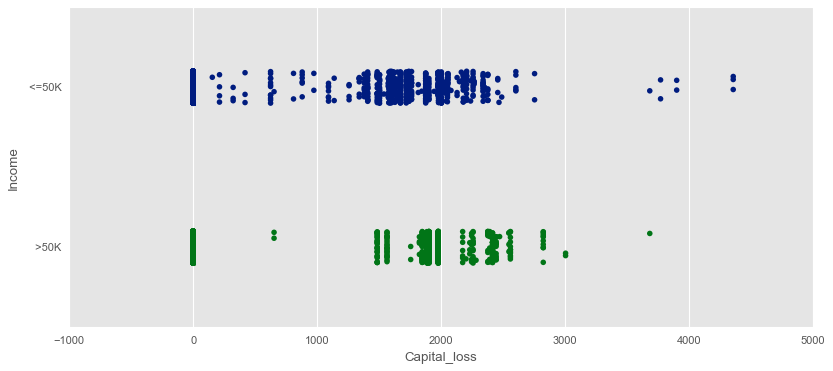

In [383]:
plt.figure(figsize=(12,5))
sns.stripplot(x='Capital_loss',y='Income',data=df)
plt.show()

From the above plot we can see that the Capital loss is higher side for the person having 50k or less.

Text(0, 0.5, 'Percentage of People')

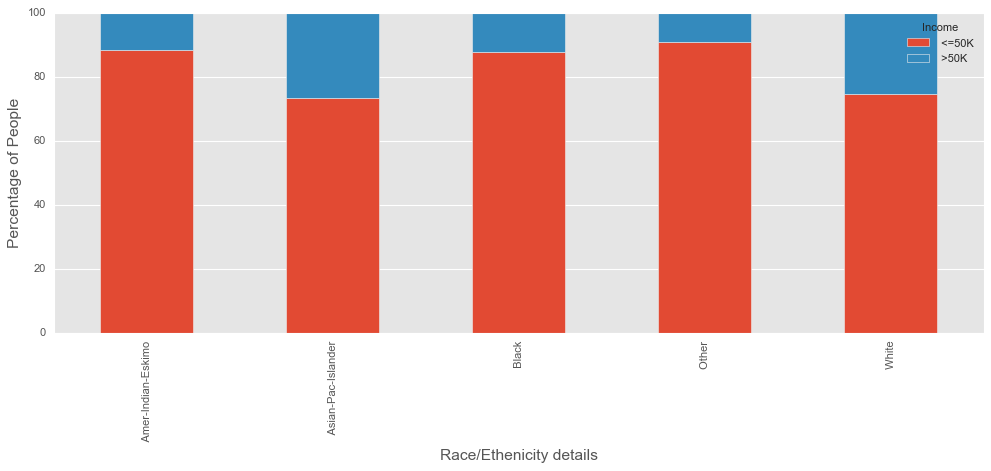

In [384]:
plt.style.use('ggplot')
tbl = pd.crosstab(df['Race'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Race/Ethenicity details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

From the above plot we can say that people of different Race has their income also different and very few people are getting above 50k as their income.

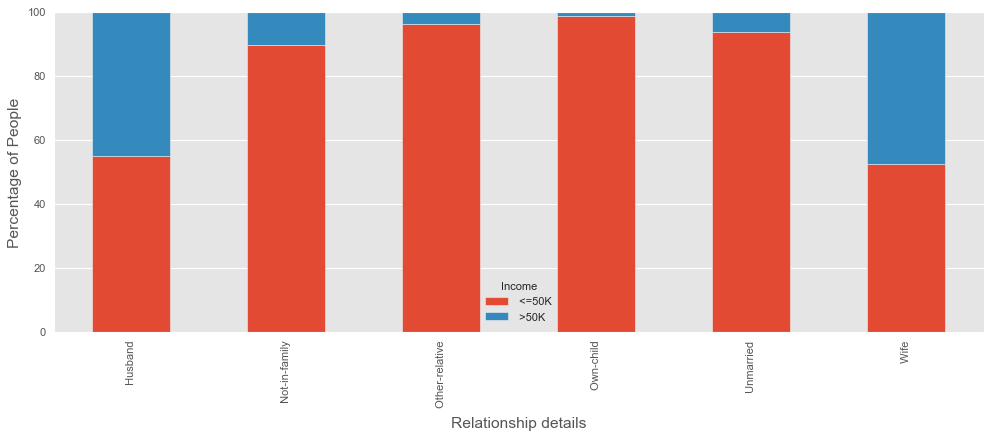

In [385]:
tbl = pd.crosstab(df['Relationship'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Relationship details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)
plt.show()

From the above plot , it is displaying that Husband and Wife has more number of people having their income more than 50k.

Text(0, 0.5, 'Percentage of People')

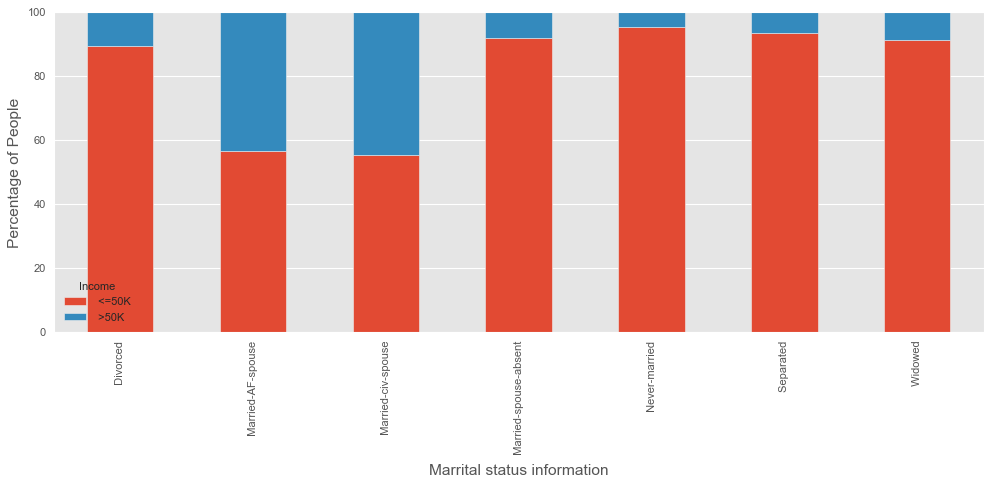

In [386]:
tbl = pd.crosstab(df['Marital_status'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Marrital status information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

This plot is showing that their is less no. of people having more than 50k as their income but group Married_civ_spouse has many people has more than 50k as their income.

Text(0, 0.5, 'Percentage of People')

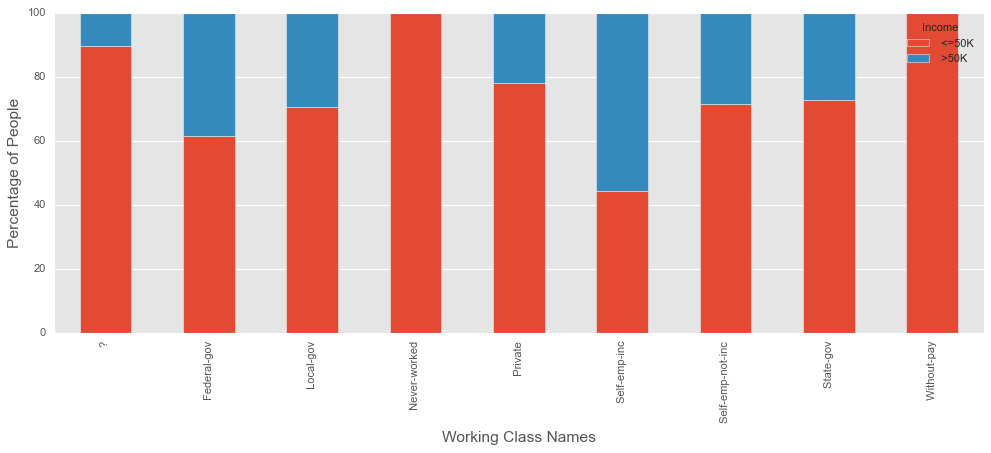

In [387]:
tbl = pd.crosstab(df['Workclass'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Working Class Names', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

From this plot we can say that Federal_gov, and private are the group in which more people having their salary more than 50k.

Text(0, 0.5, 'Percentage of People')

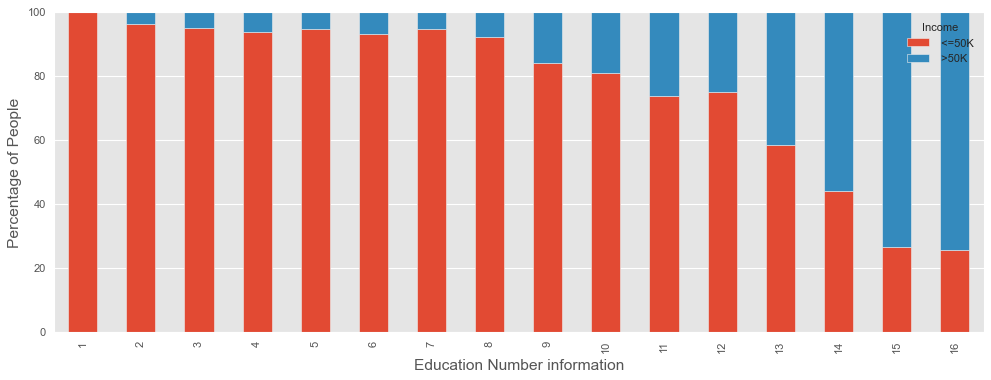

In [388]:
tbl = pd.crosstab(df['Education_num'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education Number information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Simply this graph is showing higher the Education higher would be the Income.

Text(0, 0.5, 'Percentage of People')

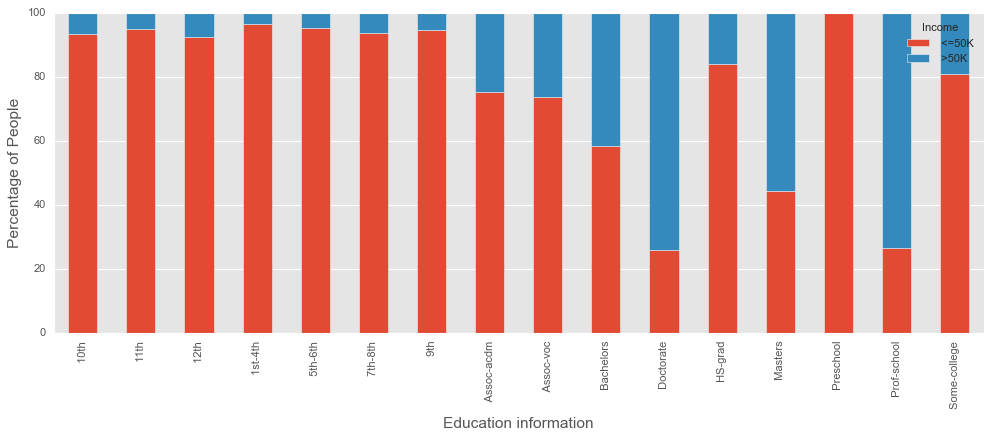

In [389]:
tbl = pd.crosstab(df['Education'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

From the above graph we can say that Masters degree has highest chance to get more than 50k.

Text(0, 0.5, 'Percentage of People')

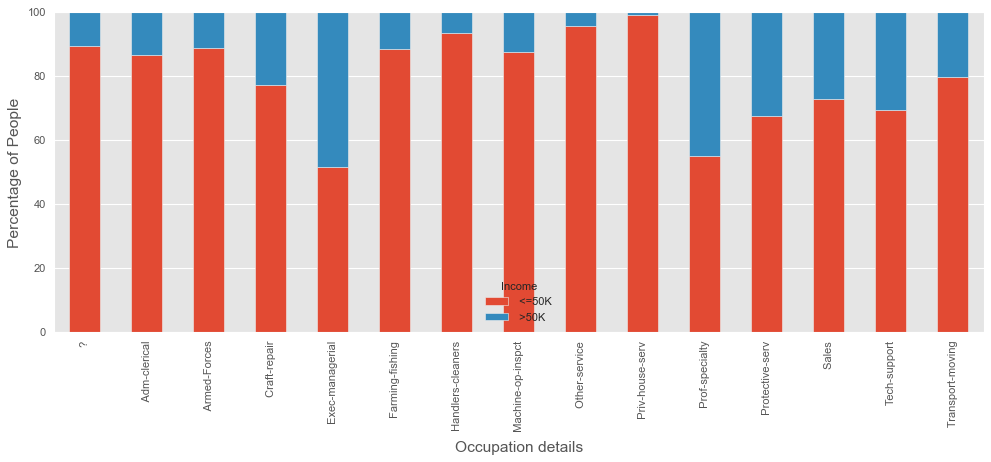

In [390]:
tbl = pd.crosstab(df['Occupation'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Occupation details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

This graph is showing how people are dependent upon their occupation.

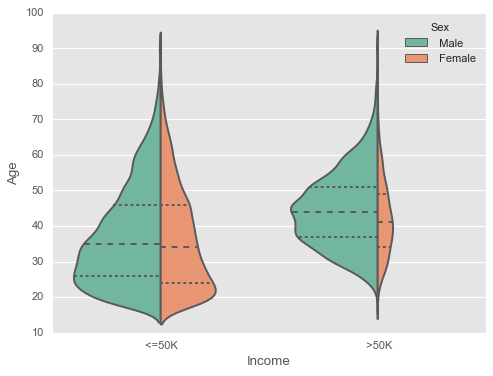

In [391]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

From the graph we can say that man having any age group is higher salary than of female.

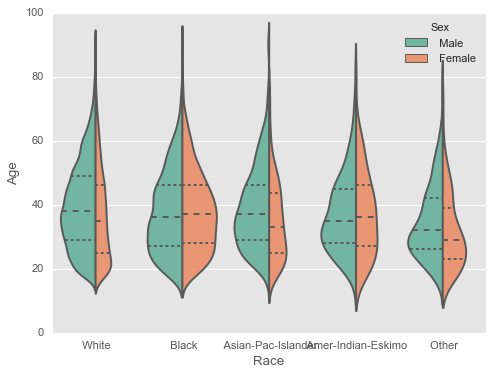

In [392]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Race", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

From the above plot ,the female number is less in every group except white and other.

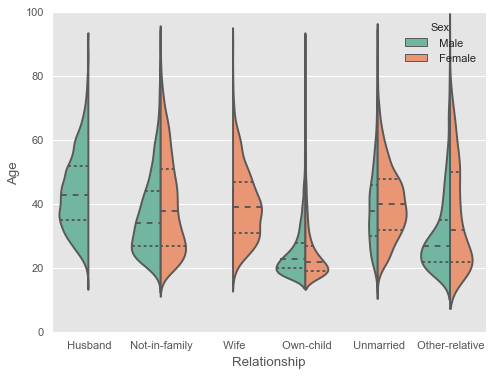

In [393]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Relationship", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

This above graph is showing that unmarried female are more than unmarried male.

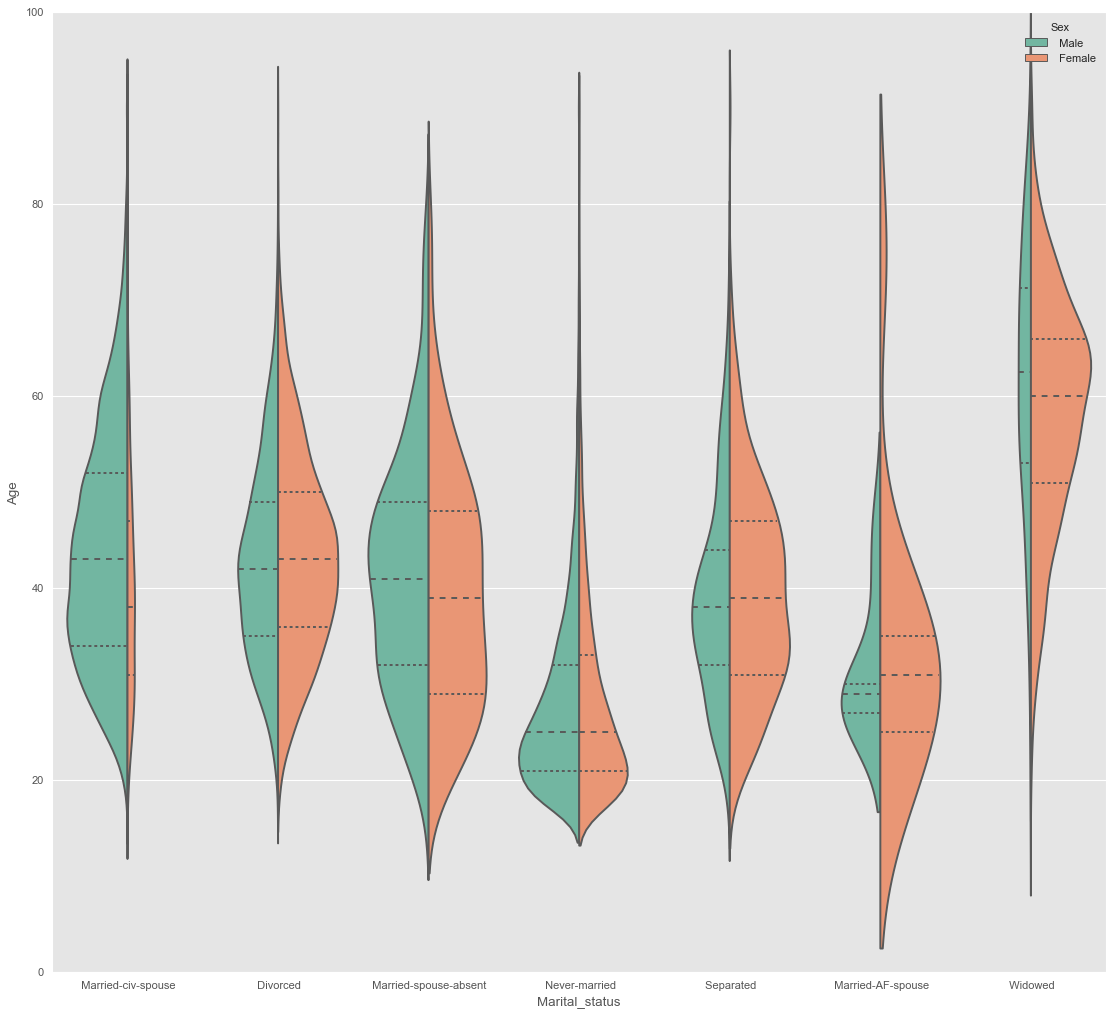

In [394]:
plt.figure(figsize=(17,15))
sns.violinplot(x="Marital_status", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

From the above graph we can say that the number of married male are more than married female.

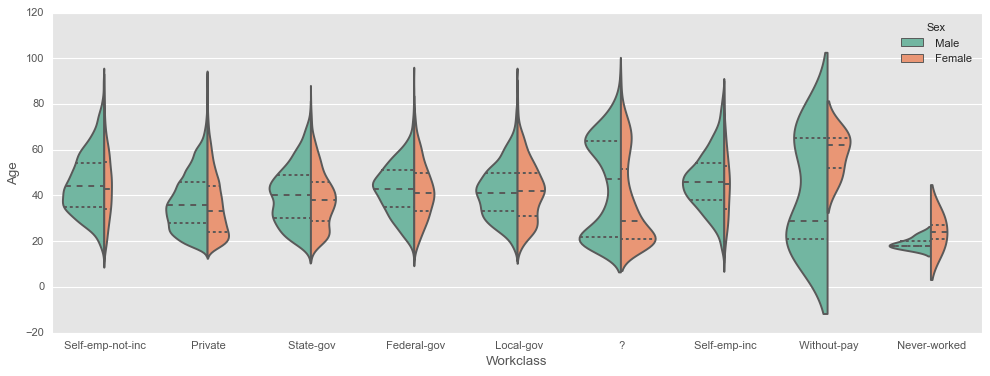

In [395]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Workclass", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

From the above , Male has captured most of workclass in every catagory as compare to female.

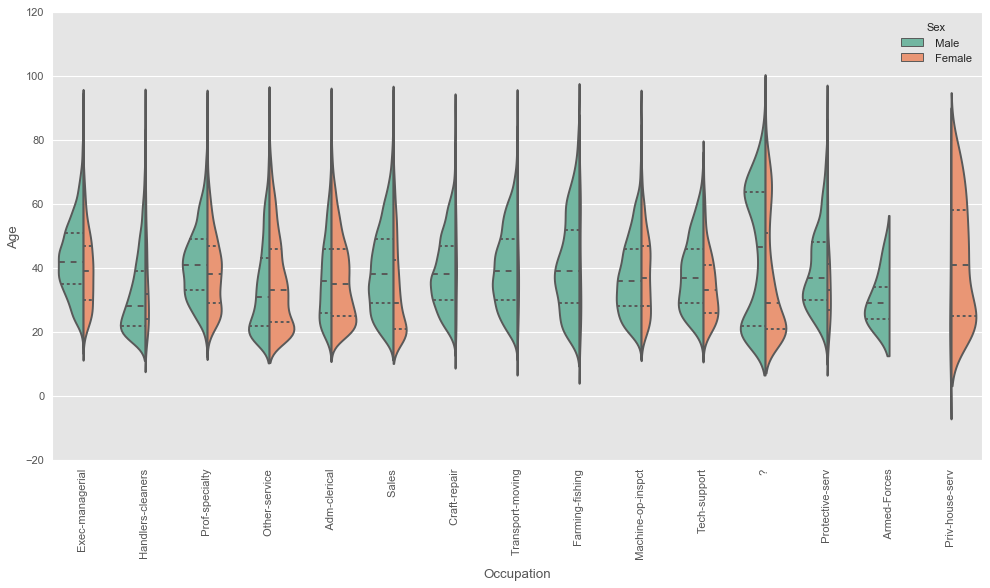

In [396]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

This graph is showing in every field male are higher in number but private house serv occupation has more number of female.

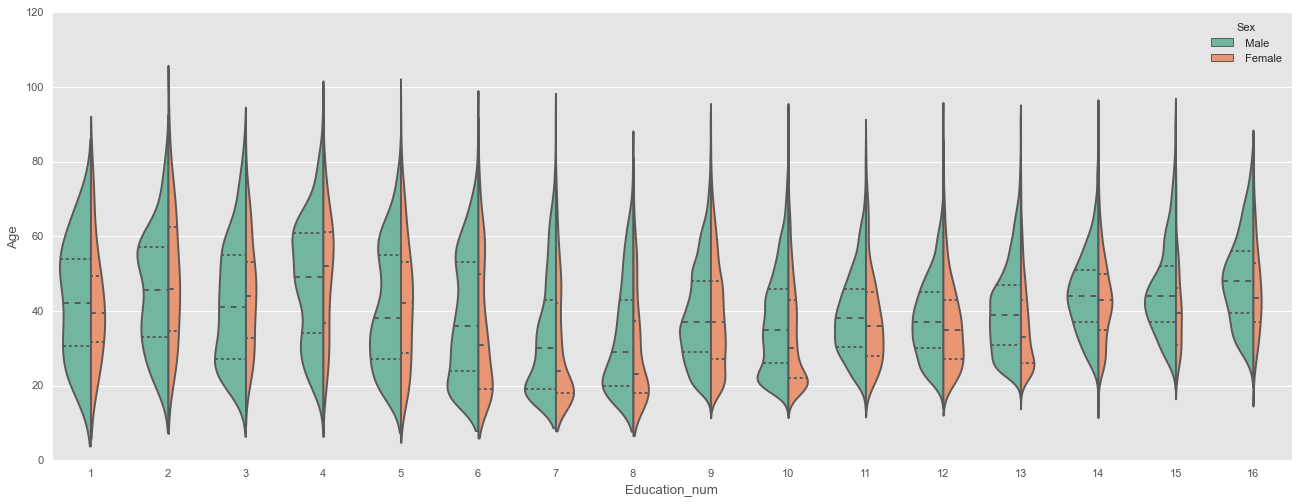

In [397]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Whole the graph showing Education num has higher number of male.

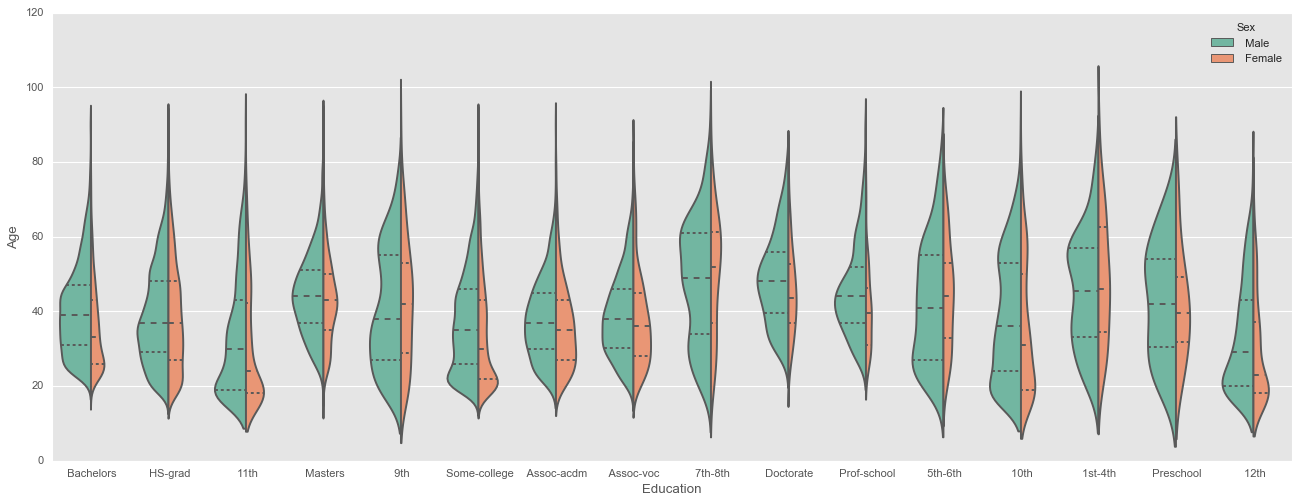

In [398]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In this graph we can see that in every place of learning the population of Male is always higher than a Female.

In [399]:
#Label Encoder
le=LabelEncoder()
df['Income']=le.fit_transform(df['Income'])

In [400]:
 m=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [401]:
#Ordinal Encoder
oe=OrdinalEncoder()
df[m]=oe.fit_transform(df[m])

In [402]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [403]:
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

i am just cheching that after using Encoder there must not present any missing value



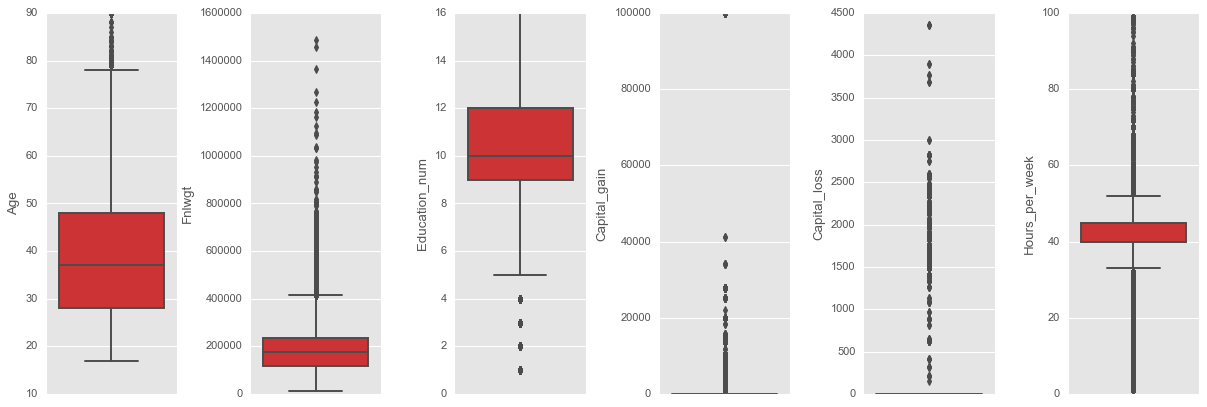

In [404]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

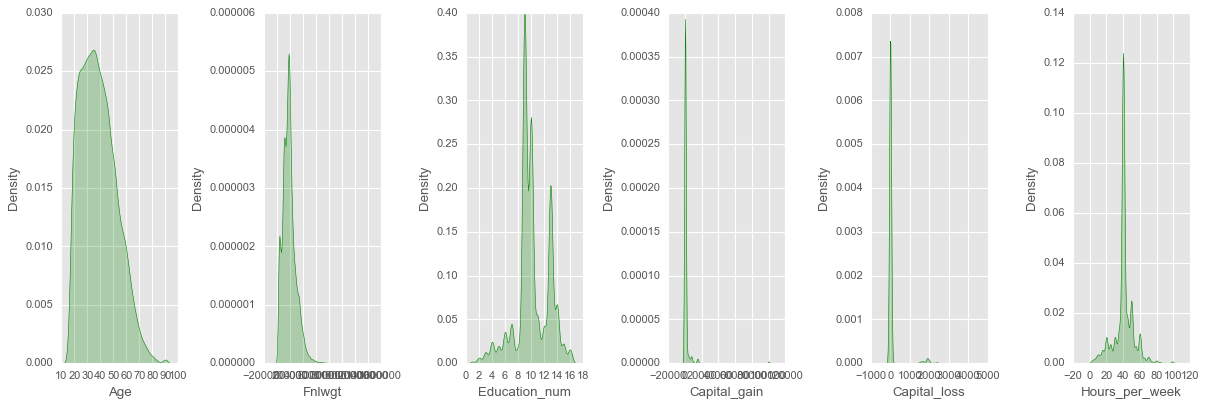

In [405]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.distplot(value,ax=ax[index], hist=False, color="g", kde_kws={'shade':True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

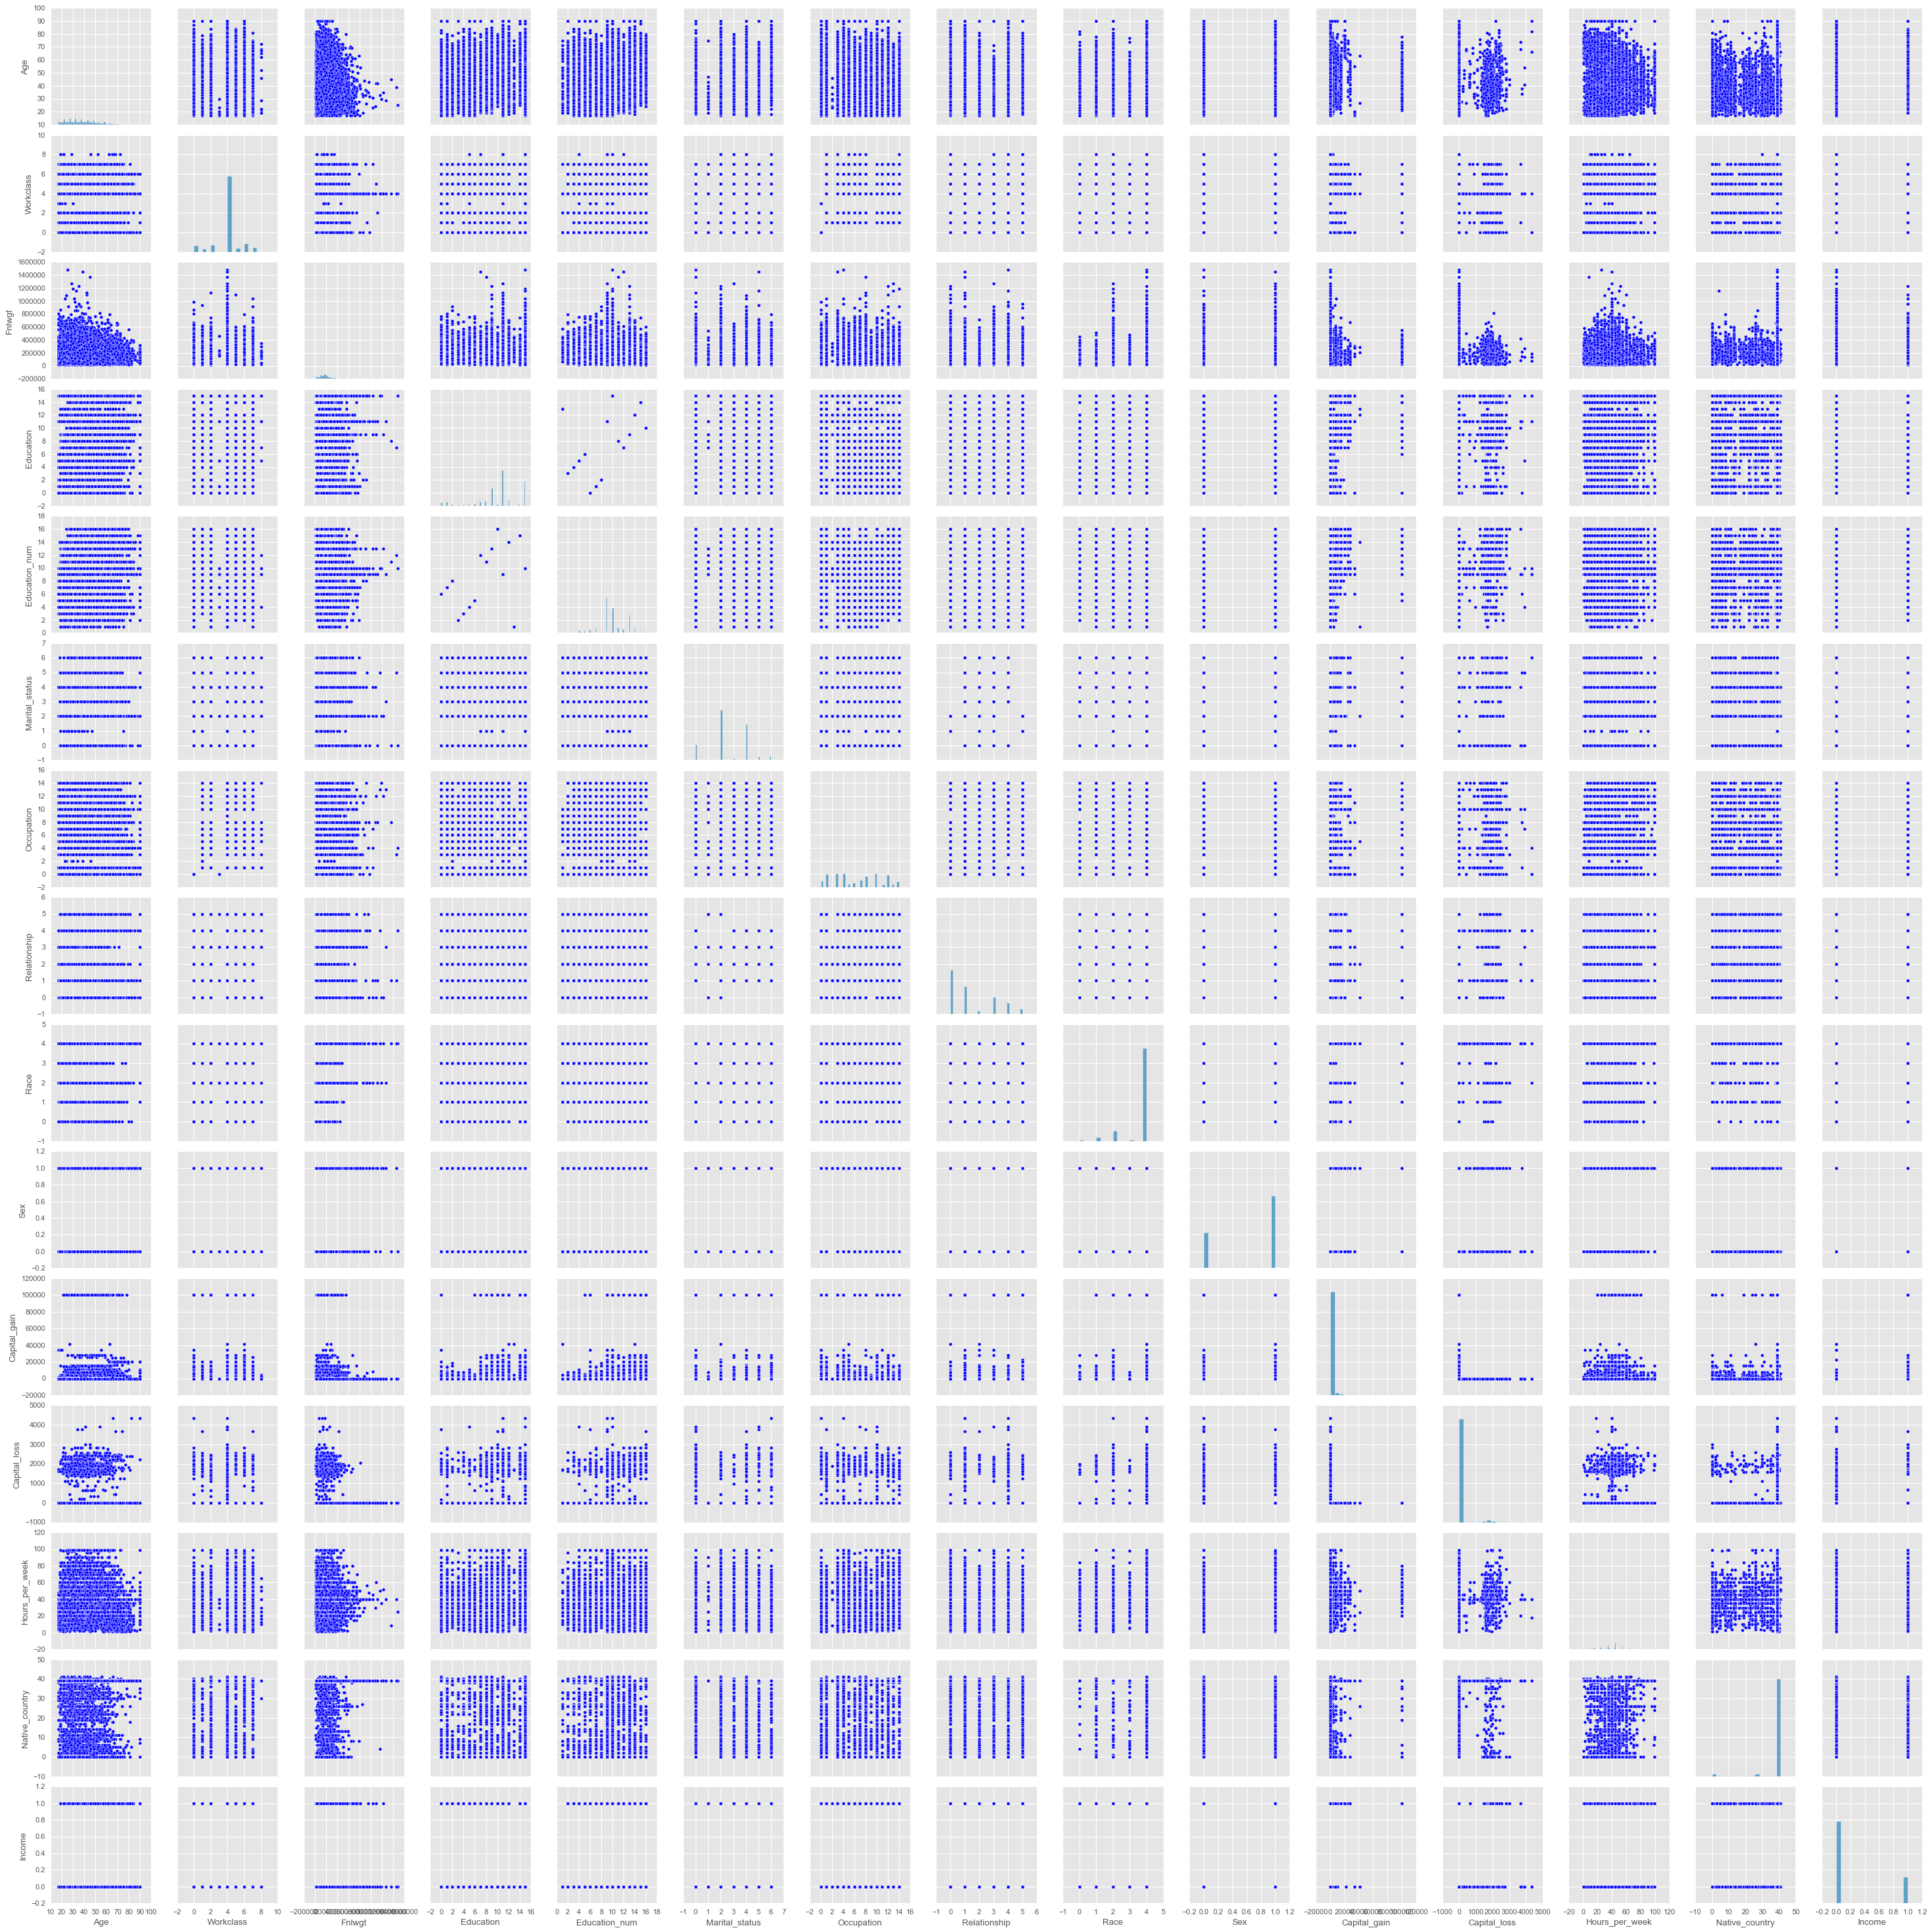

In [406]:
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

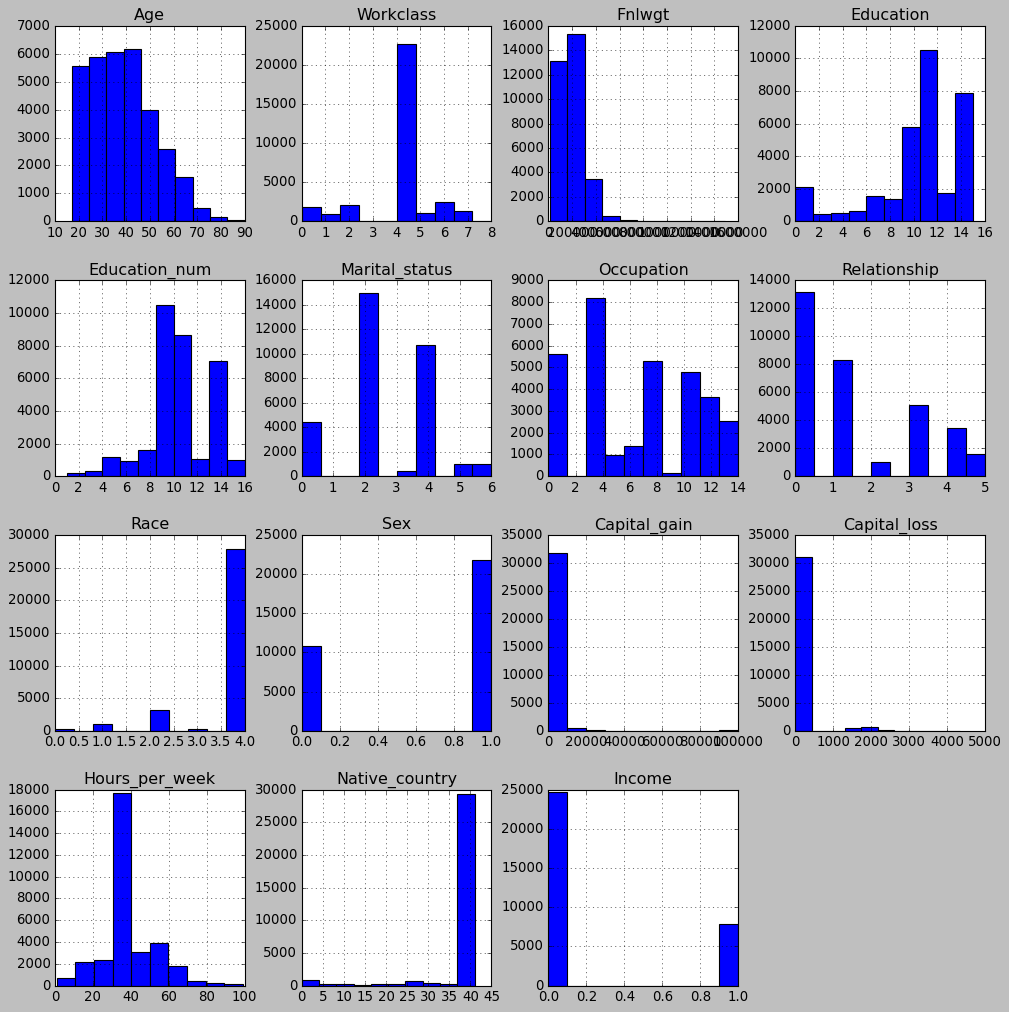

In [407]:
plt.style.use("classic")
df.hist(figsize=(15,15))
plt.show

I have applied hist plot to the all columns in dataset after encoded all from object datatype to numrical datatypes.

## correlation using Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

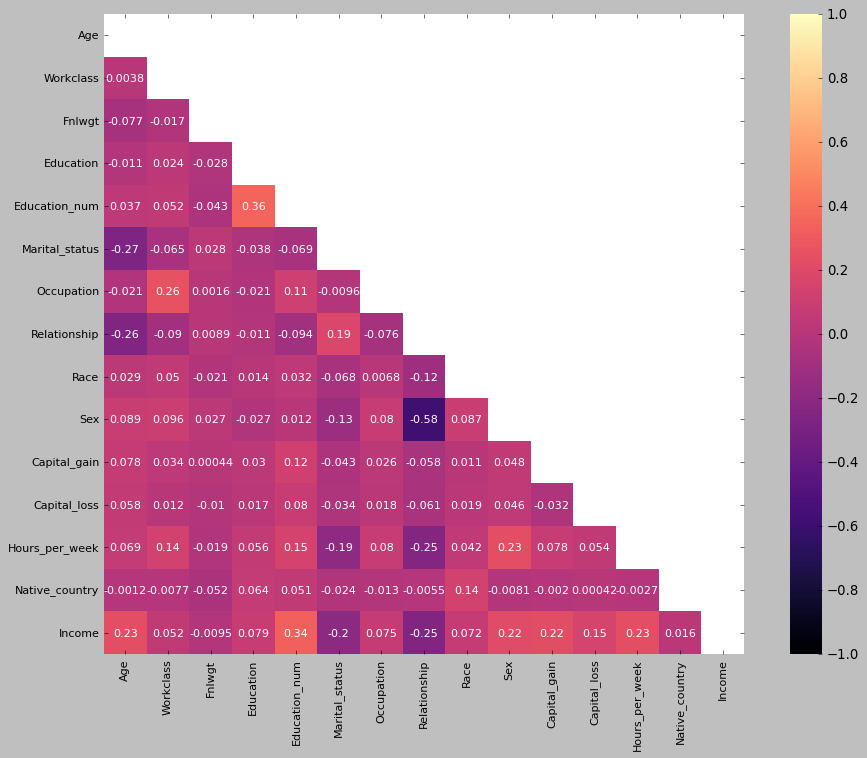

In [408]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(df.corr())
figure=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True, square=True, cmap='magma', annot_kws={'size':10},mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the above heatmap we can see that there is no multicollearity problem present in our dataset.

## Correlation Bar Plot comparing features with our label

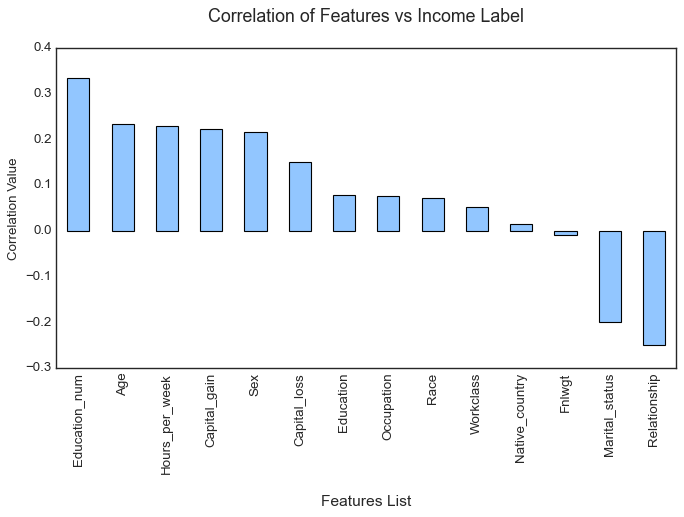

In [409]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

From the above graph we can see that only Marital_status and Relationship is having negative corr with our target.

## Remove Outliers

In [410]:
z=np.abs(zscore(df))
threashold=3
df1=df[(z<3).all(axis=1)]
df1.shape

(27417, 15)

In [411]:
loss=(df.shape[0]-df1.shape[0])/df.shape[0]*100
loss

15.795454545454547

We have used zscore to remove outliers and we can see that our dataset got removed by more than 15%.Since we have plenty of rows so we can proceed ahead with this loss.

## Using Log Transform to fix skewness

In [412]:
for loc in int_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[loc])


In [413]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

## Splitting the whole dataset into two parts namely x and y


In [414]:
X=df.drop('Income',axis=1)
Y=df['Income']

## Resolving the class imbalance issue

In [415]:
Y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

## Feature scaling

In [416]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,1.463883,-1.008742,-0.335443,1.134779,-0.406183,-0.608434,-0.900177,0.393675,0.703087,-0.145914,-0.216663,-2.222120,0.291573
1,-0.042640,0.090121,0.245046,0.181319,-0.420027,-1.734026,-0.135480,-0.277810,0.393675,0.703087,-0.145914,-0.216663,-0.035430,0.291573
2,1.057031,0.090121,0.425770,-2.402489,-1.197429,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,-0.145914,-0.216663,-0.035430,0.291573
3,-0.775755,0.090121,1.408146,-0.335443,1.134779,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-0.145914,-0.216663,-0.035430,-4.054157
4,-0.115952,0.090121,0.898170,0.439700,1.523480,-0.406183,-0.608434,2.211658,0.393675,-1.422298,-0.145914,-0.216663,-0.035430,0.291573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.090121,0.639710,-0.852204,0.746077,-0.406183,1.519858,2.211658,0.393675,-1.422298,-0.145914,-0.216663,-0.197407,0.291573
32556,0.103982,0.090121,-0.335466,0.181319,-0.420027,-0.406183,0.100997,-0.900177,0.393675,0.703087,-0.145914,-0.216663,-0.035430,0.291573
32557,1.423589,0.090121,-0.358811,0.181319,-0.420027,2.249503,-1.317864,1.589291,0.393675,-1.422298,-0.145914,-0.216663,-0.035430,0.291573
32558,-1.215624,0.090121,0.110927,0.181319,-0.420027,0.921660,-1.317864,0.966924,0.393675,0.703087,-0.145914,-0.216663,-1.655200,0.291573


I have used StandardScaler to scale each of data to avoid the bias for data in dataset.

## Finding best Random state for building best Classification model

In [417]:
maxAcc=0
maxRS=0

for i in range(0,1000):
      X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=i)
      lr=LogisticRegression()
      classifier=lr.fit(X_train,Y_train)
      pred=lr.predict(X_test)
      acc_score=accuracy_score(pred,Y_test)
        
      if acc_score>maxAcc:
        maxAcc=acc_score
        maxRS=i
        
print('best accuracy_score is',maxAcc, 'best random state is ', maxRS)

best accuracy_score is 0.8361179361179362 best random state is  500


## Feature importance bar graph

,Importance
Features,
Fnlwgt,0.168
Age,0.151
Capital_gain,0.110
Relationship,0.099
Education_num,0.093
Hours_per_week,0.083
Marital_status,0.076
Occupation,0.069
Workclass,0.040


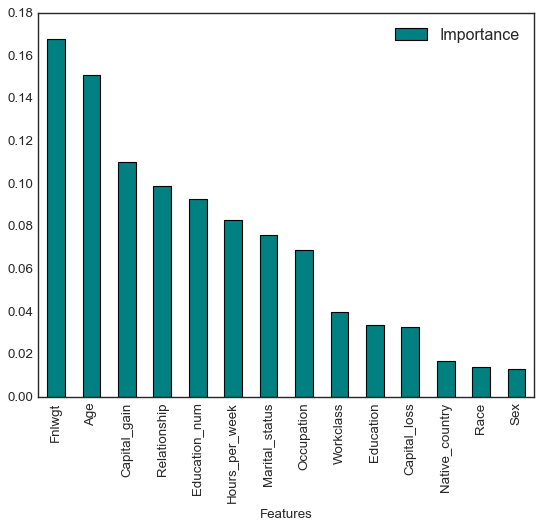

In [418]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

Good , best Random state is 500 for our dataset.

In [419]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=725)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [420]:
#logistic Regression
model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      6162
         1.0       0.72      0.48      0.57      1978

    accuracy                           0.83      8140
   macro avg       0.78      0.71      0.73      8140
weighted avg       0.82      0.83      0.81      8140

Accuracy Score: 82.72727272727273
Cross Validation Score: 82.5061425061425

Accuracy Score - Cross Validation Score is 0.22113022113023817


In [421]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      6162
         1.0       0.75      0.56      0.64      1978

    accuracy                           0.85      8140
   macro avg       0.81      0.75      0.77      8140
weighted avg       0.84      0.85      0.84      8140

Accuracy Score: 84.84029484029485
Cross Validation Score: 84.82493857493859

Accuracy Score - Cross Validation Score is 0.015356265356260224


In [422]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      6162
         1.0       0.71      0.65      0.67      1978

    accuracy                           0.85      8140
   macro avg       0.80      0.78      0.79      8140
weighted avg       0.85      0.85      0.85      8140

Accuracy Score: 84.8894348894349
Cross Validation Score: 84.12776412776412

Accuracy Score - Cross Validation Score is 0.7616707616707714


In [423]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      6162
         1.0       0.79      0.61      0.69      1978

    accuracy                           0.87      8140
   macro avg       0.84      0.78      0.80      8140
weighted avg       0.86      0.87      0.86      8140

Accuracy Score: 86.57248157248158
Cross Validation Score: 86.43120393120392

Accuracy Score - Cross Validation Score is 0.14127764127765374


In [424]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      6162
         1.0       0.72      0.62      0.67      1978

    accuracy                           0.85      8140
   macro avg       0.80      0.77      0.79      8140
weighted avg       0.85      0.85      0.85      8140

Accuracy Score: 85.08599508599508
Cross Validation Score: 84.66830466830466

Accuracy Score - Cross Validation Score is 0.41769041769042303


In [425]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 739, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

In [426]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [ ]:
GSCV.fit(X_train,Y_train)

In [ ]:
GSCV.best_params_ 

In [ ]:
Final_Model=ExtraTreesClassifier(criterion='gini',max_depth=30,n_estimators=200,n_jobs=-2,random_state=42)
classifier=Final_Model.fit(X_train,Y_train)
Fmod_predict=Final_Model.predict(X_test)
Fmod_acc=(accuracy_score(Fmod_predict,Y_test))*100
print('accuracy score = ', Fmod_acc)

I have succesfully incorporated with hyper parameter tuning on our best ML model.

## Aoc_roc curve

In [ ]:
from sklearn import metrics

In [ ]:
plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

## Confusion Matrix

In [ ]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

## Saving the model

In [ ]:
filename='final_model_05'
joblib.dump(Final_Model,filename)

I have succesfully saved the mode.